## Predição de Preços de Imóveis no Brasil

Este projeto utiliza técnicas de Machine Learning para prever os preços de imóveis no Brasil com base em diversas características, como localização, área, número de quartos, banheiros e vagas de garagem, entre outras. Através da análise exploratória de dados, engenharia de features e o uso de algoritmos de regressão, buscamos construir um modelo que seja capaz de gerar previsões precisas de preços de imóveis.

### Objetivos
- **Analisar dados imobiliários**: Entender os principais fatores que influenciam o preço dos imóveis.

- **Pré-processar os dados**: Lidar com valores ausentes, categorização de variáveis e normalização de dados.

- **Treinamento de modelos**: Utilizar algoritmos de regressão (como Regressão Linear, Random Forest e XGBoost) para prever o preço dos imóveis.

- **Avaliação de performance**: Avaliar a performance dos modelos através de métricas como RMSE (Root Mean Squared Error) e R².

### Dataset
Os dados utilizados no projeto são compostos por informações de imóveis no Brasil, contendo features como:

- **Localização (estado, cidade, bairro)**

- **Área total (m²)**

- **Número de quartos**

- **Número de banheiros**

- **Número de vagas de garagem**

- **Valor do condomínio** (se aplicável)

- **Preço final do imóvel**

### Resultados Esperados
Com este projeto, buscamos fornecer insights relevantes para o mercado imobiliário, possibilitando que compradores, vendedores e corretores tenham uma estimativa precisa de preços com base em dados históricos e características do imóvel.

### Ferramentas Utilizadas
- Python (Pandas, NumPy)

- Visualização de dados (Plotly, Matplotlib, Seaborn)

- Machine Learning (Scikit-Learn)

- Metodologia - Regressão Linear



## Etapa 1 - Analise Exploratória dos Dados

In [59]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('./dataset/sao-paulo-properties-april-2019.csv')

In [60]:
# replate all Came case to lowercase
df.columns = [col.lower() for col in df.columns]
# replace all spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [61]:
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        color="price", 
                        size="price", 
                        mapbox_style="open-street-map",
                        center=dict(lat=-23.5489, lon=-46.6388),
                        height=900,
                        zoom=10,
                        title='Mapa de Imóveis - São Paulo', 
                        labels={'price':'Preço', 
                                'latitude':'Latitude', 
                                'longitude':'Longitude'})             
fig.show()

In [62]:
# Create a pie plot to show the distribution of properties by type
fig = px.pie(df, 
             names='negotiation_type', 
             title='Tipos de Imóveis',
             labels={'property_type':'Tipo de Imóvel', 
             'negotiation_type':'Tipo de Negociação'})
fig.show()

In [68]:
# Create a plot with prices by property type
fig = px.box(df, 
             x='district', 
             y='price', 
             color='district',
             title='Preço por Tipo de Imóvel',
             labels={'price':'Preço', 'district':'Bairro'})
fig.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'condo'}>,
        <Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'toilets'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'elevator'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'swimming_pool'}>,
        <Axes: title={'center': 'new'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

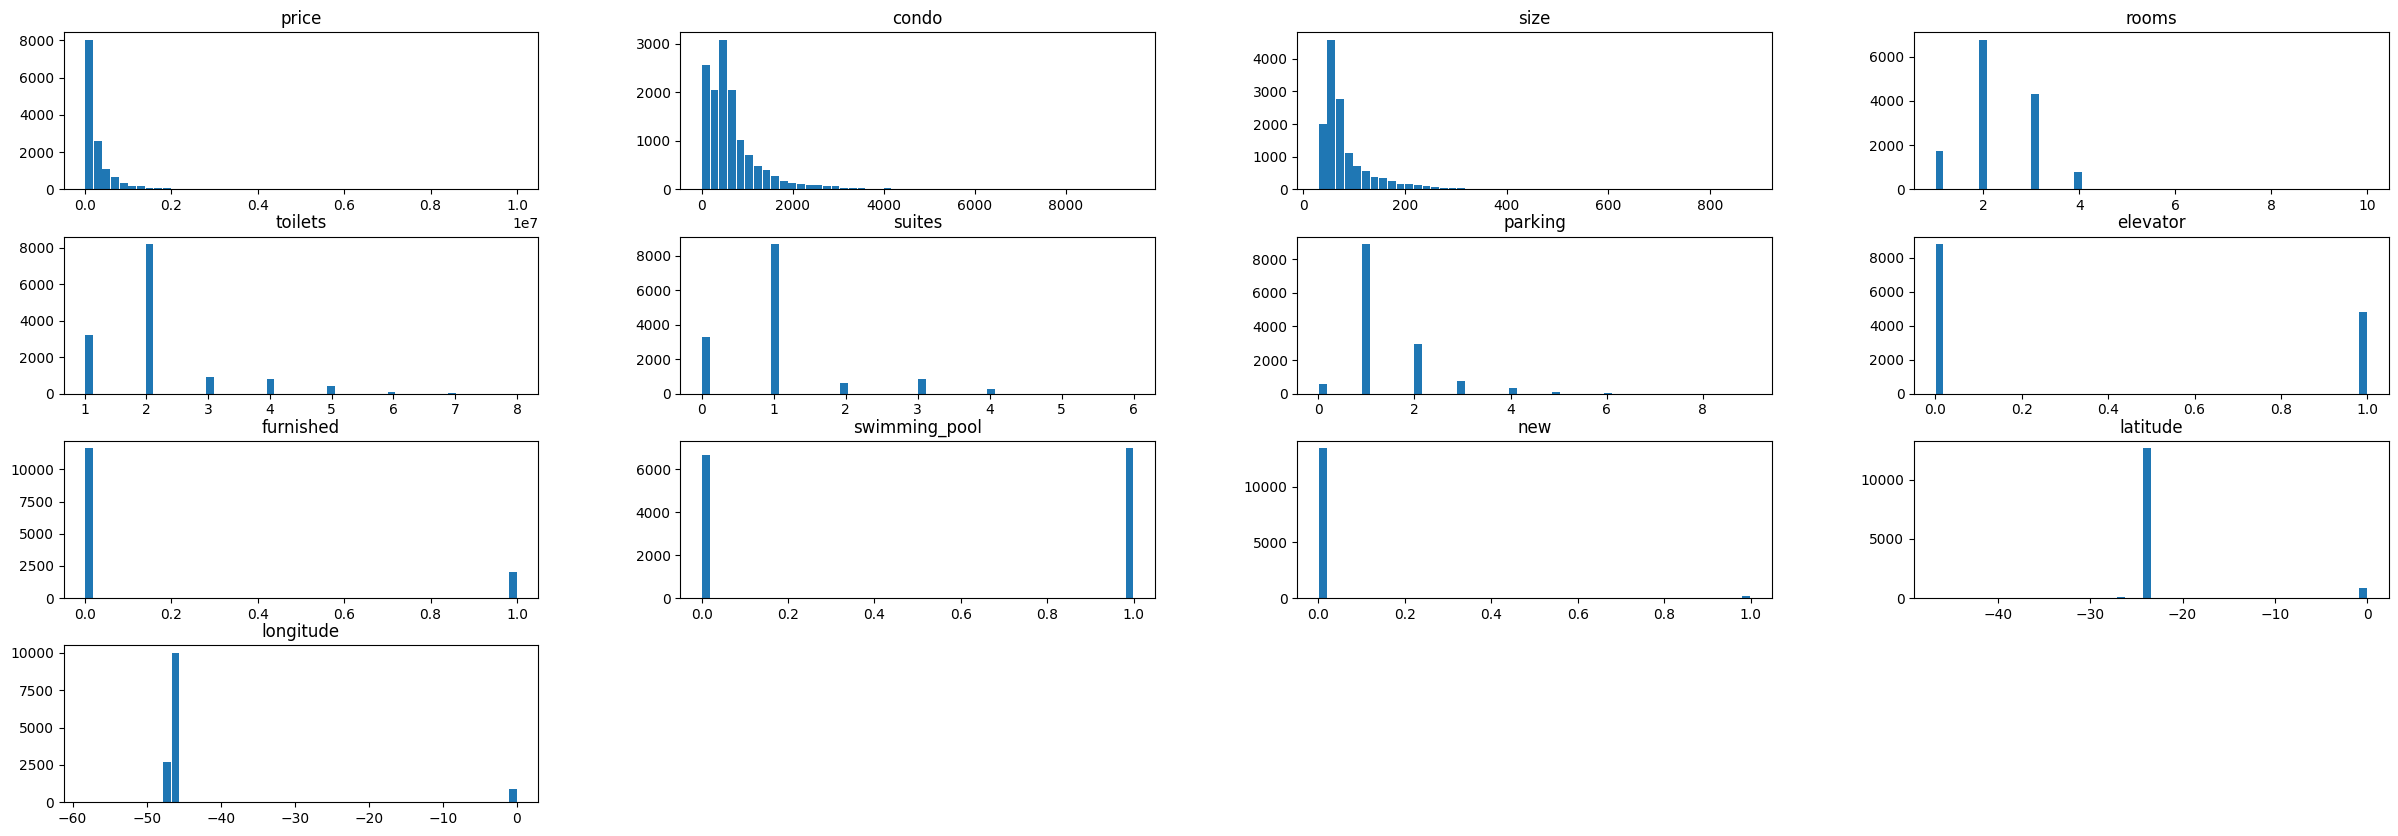

In [75]:
df.hist(bins=50, grid=False, zorder=2, rwidth=0.9, figsize=(30, 10))